In [7]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import pandas as pd

file_path = "extract_name_paragraph.csv"


data = pd.read_csv(file_path, usecols=["interviewee",  "potentially_related_profile_names", "paragraph_index", "name_extracted"])


print(data)

                         interviewee  \
0      Inge-Juliana Sackmann Christy   
1      Inge-Juliana Sackmann Christy   
2      Inge-Juliana Sackmann Christy   
3      Inge-Juliana Sackmann Christy   
4      Inge-Juliana Sackmann Christy   
...                              ...   
20277                    Donald Ames   
20278                    Donald Ames   
20279                    Donald Ames   
20280                    Donald Ames   
20281                    Donald Ames   

                       potentially_related_profile_names  paragraph_index  \
0                                            Cecil Kelly                3   
1                          Inge-Juliana Sackmann Christy                3   
2                          Inge-Juliana Sackmann Christy                4   
3           Joseph Stalin, Joseph Stein, Joseph Halperin               15   
4                                              Princeton               59   
...                                                  ... 

In [14]:
name_counts = data['name_extracted'].value_counts()
data['name_frequency'] = data['name_extracted'].map(name_counts)
sorted_df = data.sort_values(by='name_frequency', ascending=False)
sorted_df

,interviewee,potentially_related_profile_names,paragraph_index,name_extracted,name_frequency
6986,Jean Bacher,"Robert Moe, Ma Roberts, Robert Tait",28216,['Robert'],278
6975,Jean Bacher,"Robert Moe, Ma Roberts, Robert Tait",28183,['Robert'],278
6981,Jean Bacher,"Robert Moe, Ma Roberts, Robert Tait",28208,['Robert'],278
6985,Jean Bacher,"Robert Moe, Ma Roberts, Robert Tait",28212,['Robert'],278
6989,Jean Bacher,"Robert Moe, Ma Roberts, Robert Tait",28232,['Robert'],278
...,...,...,...,...,...
7155,Robert Serber,"William A. Fowler, William Foley",29032,['Willie Fowler’s'],1
7154,Robert Serber,"William Vatter, William F. Masterson, William ...",29024,['William] Pasternak'],1
10803,Richard Baker,"Charles Pigott, Charles Mayette",47304,['Charlie Mitts'],1
14729,General Leslie Groves,"Jean Tatlock, Leon Matlock",65695,['Jean] Tatlock'],1


In [15]:
file_path = "sorted_df.csv"
sorted_df.to_csv(file_path, index=False)

In [17]:
filtered_names = sorted_df[sorted_df['name_frequency'] > 20]['name_extracted'].unique().tolist()
filtered_names

["['Robert']",
 "['Marshall']",
 "['Teller']",
 "['Lawrence']",
 "['Bush']",
 "['Roosevelt']",
 "['Princeton']",
 "['Edward Teller']",
 "['Robert Oppenheimer']",
 "['Enrico Fermi']",
 "['Szilard']",
 "['Edward']",
 "['Nichols']",
 "['Truman']",
 "['Bob']",
 "['Styer']",
 "['Mike']",
 "['Frank']",
 "['Keith']",
 "['Stalin']",
 "['Niels Bohr']",
 "['Bill']",
 "['Heisenberg']",
 "['Dorothy']",
 "['Enrico] Fermi']",
 "['Klaus Fuchs']",
 "['Joe']",
 "['Dick']",
 "['Geiger']",
 "['Cindy Kelly']",
 "['George']",
 "['John']",
 "['Peter']",
 "['Robert] Oppenheimer']",
 "['Ernest Lawrence']",
 "['Hans Bethe']",
 "['Leo Szilard']",
 "['Dorothy McKibbin']",
 "['John Wheeler']",
 "['Stimson']",
 "['Don']",
 "['Joan']",
 "['Leslie] Groves']",
 "['Jim']",
 "['Reagan']",
 "['Arthur Compton']",
 "['Bohr']",
 "['Tom']",
 "['Hans']",
 "['Edward] Teller']",
 "['Harry']",
 "['Fermi']",
 "['Kennedy']",
 "['Roger Williams']",
 "['Compton']",
 "['Baker']",
 "['Paul']",
 "['Mary']",
 "['Chadwick']",
 "['Glenn 

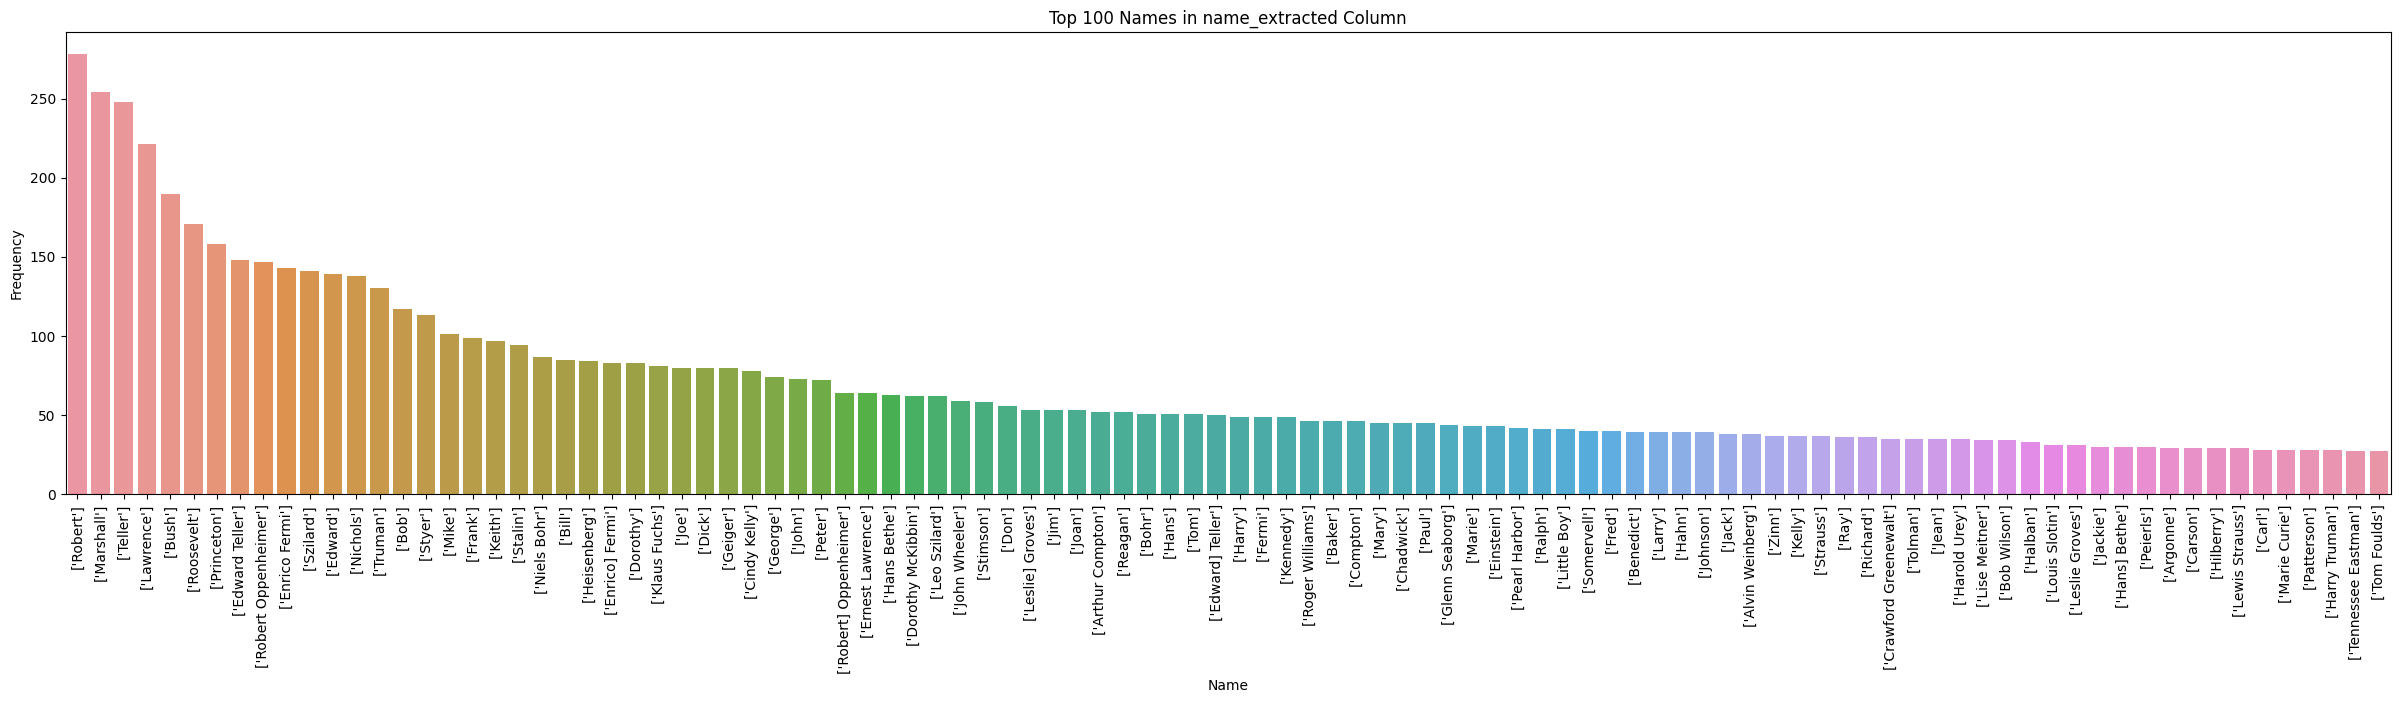

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

name_freq = data['name_extracted'].value_counts()

top_100_names = name_freq[:100]

plt.figure(figsize=(30, 6))
sns.barplot(x=top_100_names.index, y=top_100_names.values)
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.title('Top 100 Names in name_extracted Column')
plt.show()

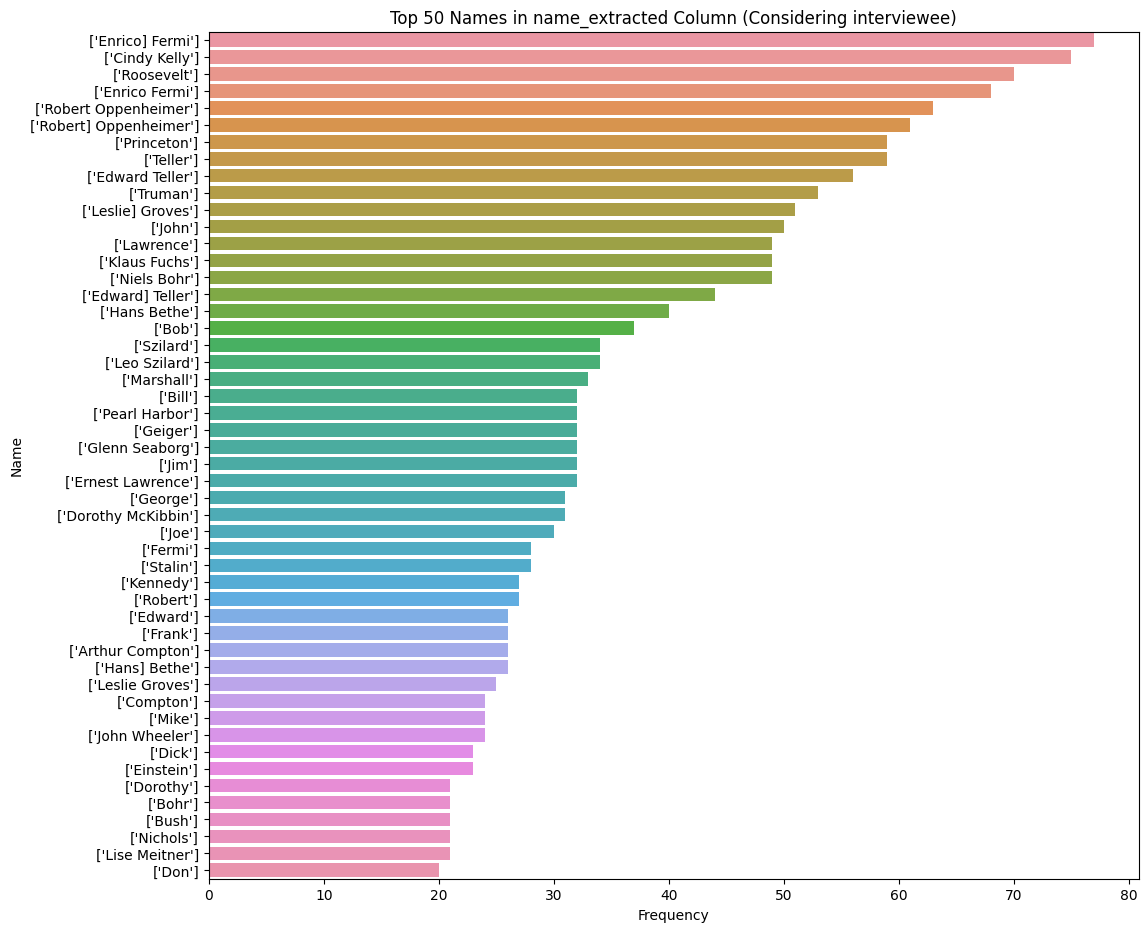

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

data['combined'] = data['interviewee'] + '_' + data['name_extracted']
name_frequency = data.drop_duplicates(['interviewee', 'combined'])['name_extracted'].value_counts().reset_index(name='frequency').head(50)

plt.figure(figsize=(12, 11))
sns.barplot(x='frequency', y='index', data=name_frequency)
plt.xlabel('Frequency')
plt.ylabel('Name')
plt.title('Top 50 Names in name_extracted Column (Considering interviewee)')
plt.show()
data.drop('combined', axis=1, inplace=True)


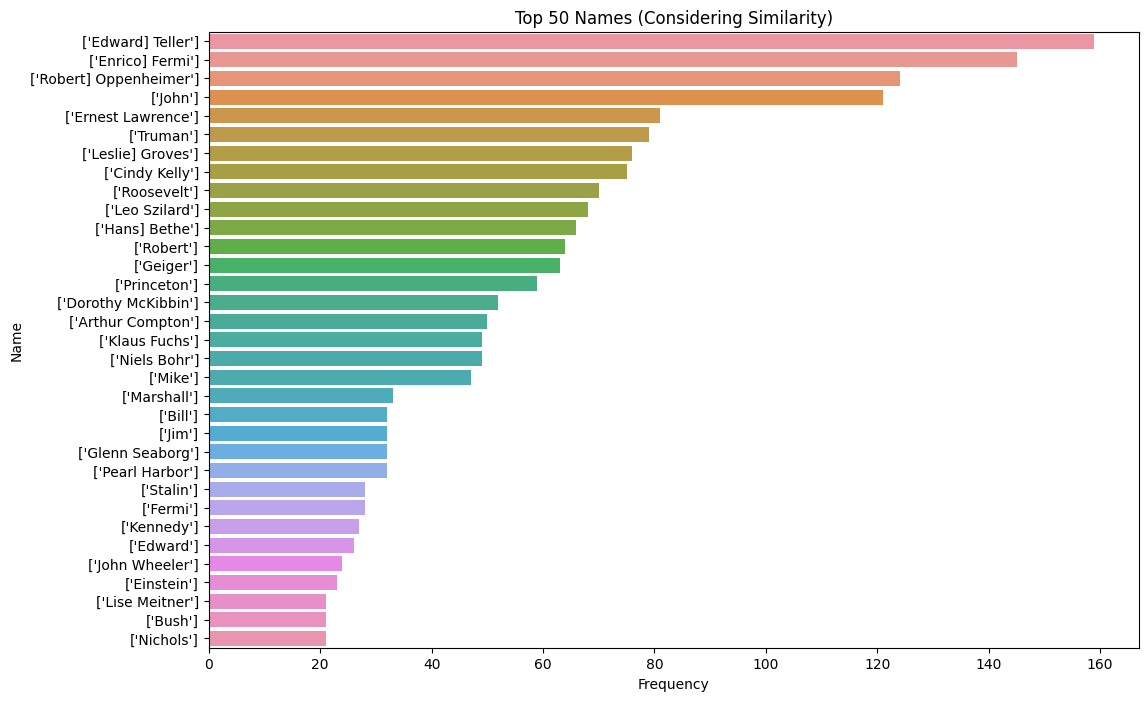

In [52]:
import difflib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

similarity_threshold = 0.7

name_groups = {}

for name in name_frequency['index']:
    found_group = False
    for group in name_groups:
        similarity = difflib.SequenceMatcher(None, name, group).ratio()
        if similarity > similarity_threshold:
            name_groups[group].append(name)
            found_group = True
            break
    if not found_group:
        name_groups[name] = [name]

for group in name_groups:
    representative_name = max(name_groups[group], key=len)
    name_frequency.loc[name_frequency['index'].isin(name_groups[group]), 'index'] = representative_name

name_frequency = name_frequency.groupby('index')['frequency'].sum().reset_index()

top_names = name_frequency.sort_values('frequency', ascending=False).head(50)

plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='index', data=top_names)
plt.xlabel('Frequency')
plt.ylabel('Name')
plt.title('Top 50 Names (Considering Similarity)')
plt.show()


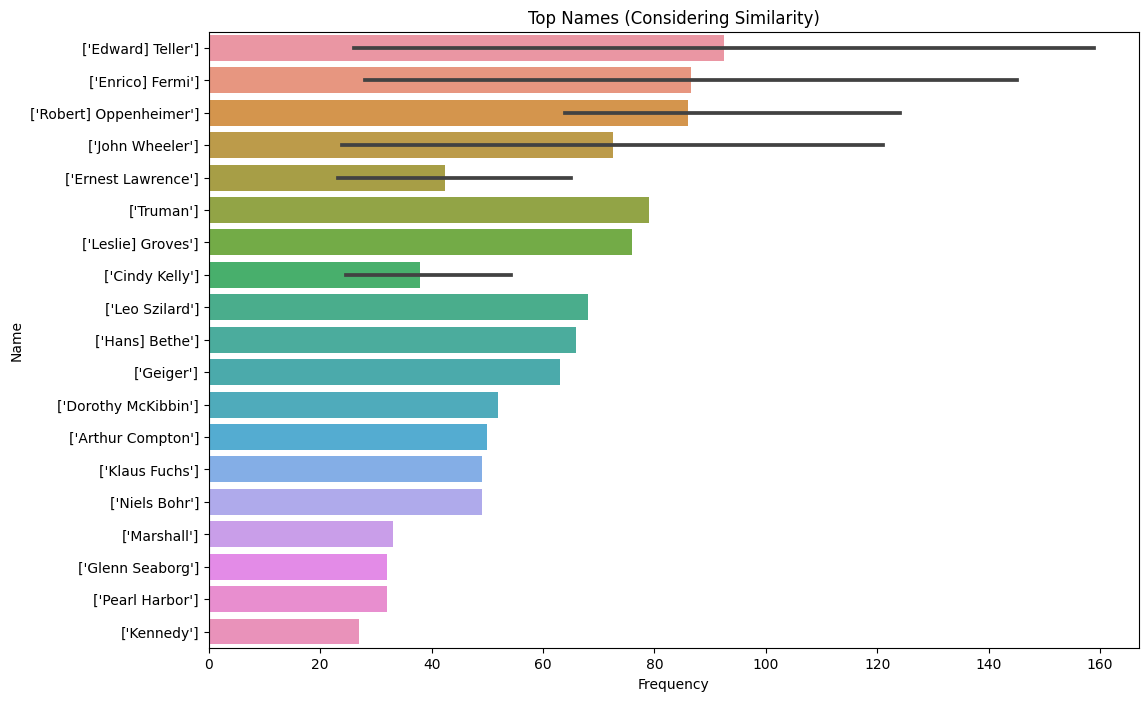

In [64]:
import difflib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

similarity_threshold = 0.6

name_groups = {}
for name in name_frequency['index']:
    found_group = False
    for group in name_groups:
        similarity = difflib.SequenceMatcher(None, name, group).ratio()
        if similarity > similarity_threshold:
            name_groups[group].append(name)
            found_group = True
            break
    if not found_group:
        name_groups[name] = [name]

for group in name_groups:
    representative_name = max(name_groups[group], key=len)
    name_frequency.loc[name_frequency['index'].isin(name_groups[group]), 'index'] = representative_name

name_frequency['frequency'] = name_frequency.groupby(data['interviewee'])['frequency'].transform(lambda x: 1 if x.name == 'interviewee' else x)

top_names = name_frequency.sort_values('frequency', ascending=False).head(50)

plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='index', data=top_names)
plt.xlabel('Frequency')
plt.ylabel('Name')
plt.title('Top Names (Considering Similarity)')
plt.show()


In [66]:
data

,interviewee,potentially_related_profile_names,paragraph_index,name_extracted
0,Inge-Juliana Sackmann Christy,Cecil Kelly,3,['Cindy Kelly']
1,Inge-Juliana Sackmann Christy,Inge-Juliana Sackmann Christy,3,['Inge-Juliana Sackmann Christy']
2,Inge-Juliana Sackmann Christy,Inge-Juliana Sackmann Christy,4,['Inge-Juliana Sackmann Christy']
3,Inge-Juliana Sackmann Christy,"Joseph Stalin, Joseph Stein, Joseph Halperin",15,['Joseph] Stalin']
4,Inge-Juliana Sackmann Christy,Princeton,59,['Princeton']
...,...,...,...,...
20277,Donald Ames,Glenn Seaborg,98172,['Glenn Seaborg']
20278,Donald Ames,Gilbert N. Lewis,98174,['Gilbert Newton] Lewis']
20279,Donald Ames,"Ernest O. Lawrence, Ernest C. Lawrence, Kennet...",98174,['Ernest] Lawrence']
20280,Donald Ames,John J. Jack,98174,['John] J.']
